In [2]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#1
# критическое значение p = 1/2. Если p >= 1/2, то q = 1. Если p < 1/2, то q = p/(1-p)
#параметры
p = 1/4
n = 10
N = 1000


#моделируем
count = 0
for i in range(N):
    Z = 1
    for j in range(n):
        Z = np.sum(scipy.stats.geom.rvs(p=p,size=Z)-1)
        if Z == 0:
            count += 1
            break

            
print('эмпирическая: ',count / N)
print('теоретическая: ', round(p/(1-p),3))

эмпирическая:  0.317
теоретическая:  0.333


[ 1  1  4  1  1  2  2  7 18 10 16 18 12 11  8 15 16 20 27 31 34 21 18 18
 24 24 26 31 42 54 62 70 68 54 60 64 64 66 71 96 77 73 82 76 77 80 70 63
 50 52]
[  1   3   6   6  12  20  30  41  49  58  65  76 107  89  96 118 109 126
 115 131 140 101  91 107  97  97  91  73  65  63  56  52  50  61  65  50
  37  51  42  38  39  44  62  52  35  35  37  41  38  45]
[ 1  2  5 14 14 10  6  3  4  5 15 19 22 24 36 48 41 38 45 47 61 55 41 29
 24 31 29 33 34 25 19 29 28 24 17 27 27 19 17 13 11  5  4  5  5  4  2  1
  2  3]
[ 1  3  8 10 19 28 15 19 24 10 12 16 13 12 12 28 19 15 15 13 15 15 19 17
 14 17 15 17 13 11  7  9 15 29 16 17 10  4 14 22 20 24 35 31 28  7  4  2
  8 19]
[ 1  4  7 12 17 14  9 13 21 20 20 18 17 16 21 24 20 19 18 25 20 19 25 28
 25 24 34 31 31 19 22 18 25 29 29 19 14 12 15 30 20 31 29 43 46 41 54 47
 26 21]
эмпирическая:  0.027
теоретическая:  0.02 

выжившие: 
 [52, 45, 3, 19, 21, 75, 41, 12, 4, 24, 22, 126, 2, 155, 42, 2, 16, 62, 40, 42, 22, 16, 33, 21, 235, 35, 123]


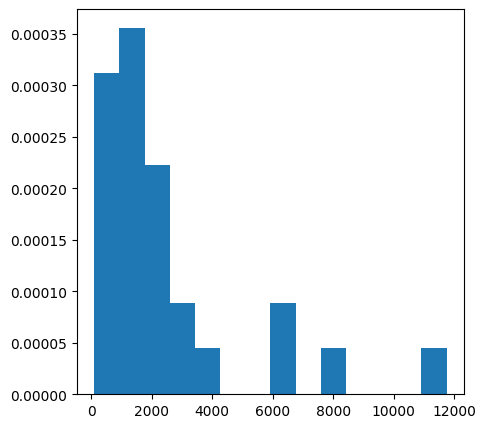

In [36]:
#2 (a)
#параметры
p = 1/2
n = 50
N = 1000
D = (1-p)/(p*p)
k = 5 #число траекторий для вывода

#моделируем
survivors = []
for i in range(N):
    Z = np.zeros(n,dtype=int)
    Z[0] = 1
    for j in range(1,n):
        Z[j] = np.sum(scipy.stats.geom.rvs(p=p,size=Z[j-1])-1)
        if Z[j] == 0:
            break
    if Z[-1] != 0:
        survivors.append(Z[-1])
        if k > 0:
            k -= 1
            print(Z)


#анализ
pr_emp = len(survivors)/N
pr_th = 2/(n*D)
Z = np.array(survivors)/pr_th
print('эмпирическая: ',pr_emp)
print('теоретическая: ',pr_th,'\n')
print('выжившие: \n',survivors)
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.hist(Z,density=True,bins=round(len(survivors)/2))
plt.show()

In [40]:
#2 (b)
#параметры
p = 1/2 + 0.5
n = 20
N = 1000
D = (1-p)/(p*p)
k = 5 #число траекторий для вывода

#моделируем
survivors = []
for i in range(N):
    Z = np.zeros(n,dtype=int)
    Z[0] = 1
    for j in range(1,n):
        Z[j] = np.sum(scipy.stats.geom.rvs(p=p,size=Z[j-1])-1)
        if Z[j] == 0:
            break
    if Z[-1] != 0:
        survivors.append(Z[-1])
        if k > 0:
            k -= 1
            #print(Z)


#анализ
pr_emp = len(survivors)/N
pr_th = ((1-p)/p)**N
Z = survivors
print('эмпирическая: ',pr_emp)
print('теоретическая: ',round(pr_th,3),'\n')
print('выжившие: \n',survivors)
#fig,ax=plt.subplots(1,1,figsize=(5,5))
#ax.hist(Z,density=True,bins=round(len(survivors)/2))
#plt.show()

эмпирическая:  0.0
теоретическая:  0.0 

выжившие: 
 []


[  1   2   3   5   5   5   8   6  11  20  21  26  50  78  93 104 139 201
 258 293]
[ 1  3  5  2  2  1  3  7  7  5  4  4  7 14 13 13 26 29 33 47]
[  1   3   3   9  10  17  25  17  11  15  22  45  56  66  92  85  96 110
 156 228]
[  1   4   5   8   4  12  22  39  49  84 101 108 140 176 233 284 320 396
 476 575]
[  1   1   3   6   4   4   8  12   7  14  18  32  38  70  97 113 138 142
 140 143]


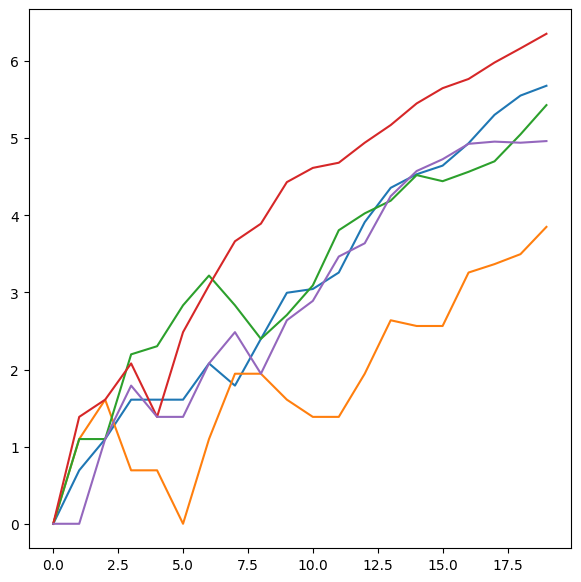

In [2]:
#3
#параметры
n = 20
p = 0.45
N = 5
fig,ax=plt.subplots(1,1,figsize=(7,7))


#моделируем
k = 0
while k < N:
    Z = np.zeros(n,dtype=int)
    Z[0] = 1
    for j in range(1,n):
        Z[j] = np.sum(scipy.stats.geom.rvs(p=p,size=Z[j-1])-1)
        if Z[j] == 0:
            break
    if Z[-1] != 0:
        print(Z)
        Z = np.log(Z)
        plt.plot(range(n),Z)
        k += 1
plt.show()

In [3]:
#4
#параметры
p = 0.75
n = 50
K = range(1,6)
pr_k = np.zeros(5)
N = 1000


#моделируем
for i in range(N):
    Z = np.zeros(n,dtype=int)
    Z = 1
    for j in range(1,n):
        Z = np.sum(scipy.stats.geom.rvs(p=p,size=Z)-1) + 1 #иммиграция
    for k in K:
        if Z == k:
            pr_k[k-1] += 1


pr_k = pr_k / N
print('в момент n =',n,':\n',pr_k)
print(np.sum(pr_k))

в момент n = 50 :
 [0.668 0.202 0.083 0.029 0.009]
0.9910000000000001
